In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd {'/content/drive/MyDrive/TFG'}

/content/drive/MyDrive/TFG


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU
from sklearn.metrics import accuracy_score

In [1]:
accRNN_adam = [0.9249295592308044, 0.9475112557411194, 0.9443193674087524, 0.9356406331062317, 0.9304908514022827]
accRNN_sgd = [0.7018791437149048, 0.7025431394577026, 0.689521849155426, 0.672959566116333, 0.6828294992446899]
accRNN_rmsprop = [0.9999615550041199, 0.9999850392341614, 0.9999850392341614, 0.9999850392341614, 0.9999849796295166]
lossRNN_adam = [0.8530230522155762, 0.8113276958465576, 0.737013041973114, 0.792432427406311, 0.8136549592018127]
lossRNN_sgd = [51.295135498046875, 43.80455780029297, 45.60039138793945, 52.945960998535156, 59.07015609741211]
lossRNN_rmsprop =[6.62883186340332, 6.452637672424316, 6.565488338470459, 6.554611682891846, 6.56516170501709]

In [2]:
accLSTM_adam = [0.9629786014556885, 0.9656288027763367, 0.9710139036178589, 0.9786491394042969, 0.9755035638809204]
accLSTM_sgd = [0.6889070868492126, 0.7250271439552307, 0.7205098271369934, 0.7422288060188293, 0.6982935667037964]
accLSTM_rmsprop = [0.999980092048645, 0.9999850392341614, 0.9999850392341614, 0.9999850392341614, 0.9999850392341614]
lossLSTM_adam = [1.044882893562317, 1.044932246208191, 1.0637375116348267, 1.1329225301742554, 0.9172900319099426]
lossLSTM_sgd = [7.204573154449463, 7.012167930603027, 7.05082368850708, 6.433099269866943, 8.532952308654785]
lossLSTM_rmsprop =[6.063016414642334, 5.862472057342529, 5.86850118637085, 6.05424690246582, 6.367907524108887]

In [3]:
accGRU_adam = [0.9458956122398376, 0.9602923393249512, 0.9626731872558594, 0.9687591195106506, 0.960907518863678]
accGRU_sgd = [0.6844967603683472, 0.6509634256362915, 0.6861323714256287, 0.718620240688324, 0.7216149568557739]
accGRU_rmsprop = [0.999976634979248, 0.9999850392341614, 0.9999850392341614, 0.9999850392341614, 0.9999850392341614]
lossGRU_adam = [0.8922153115272522, 0.8861117959022522, 0.9339278340339661, 0.9187936186790466, 0.8084729313850403]
lossGRU_sgd = [17.529258728027344, 25.362628936767578, 22.955459594726562, 22.06159019470215, 21.523193359375]
lossGRU_rmsprop =[6.020956993103027, 6.0617451667785645, 6.190139293670654, 6.35048770904541, 6.762490272521973]

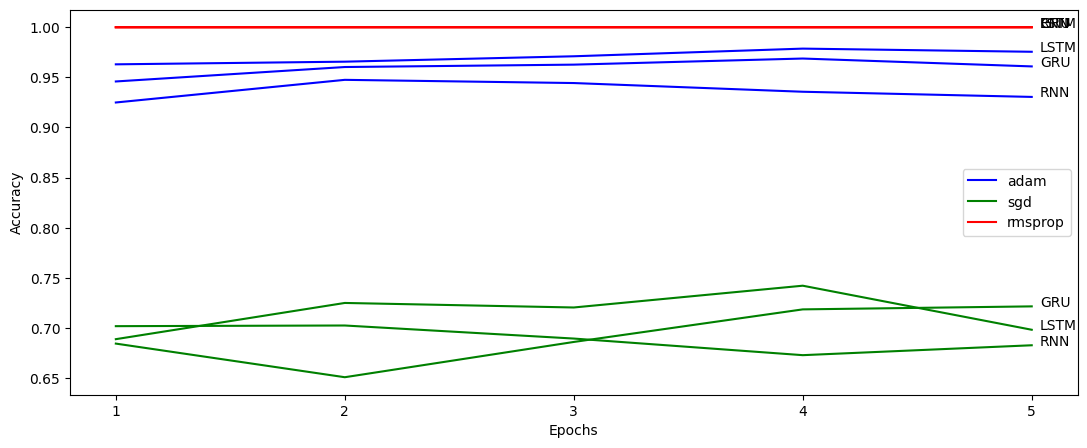

In [7]:
plt.figure(figsize=(13, 5))
x = [1,2,3,4,5]
plt.plot(x,accRNN_adam, color='blue', label='adam')
plt.plot(x,accRNN_sgd, color='green', label='sgd')
plt.plot(x,accRNN_rmsprop, color='red', label='rmsprop')
plt.plot(x,accLSTM_adam, color='blue')
plt.plot(x,accLSTM_sgd, color='green')
plt.plot(x,accLSTM_rmsprop, color='red')
plt.plot(x,accGRU_adam, color='blue')
plt.plot(x,accGRU_sgd, color='green')
plt.plot(x,accGRU_rmsprop, color='red')
plt.xticks(x)
for y, txt in zip([accRNN_adam, accRNN_sgd, accRNN_rmsprop, accLSTM_adam, accLSTM_sgd, accLSTM_rmsprop, accGRU_adam, accGRU_sgd, accGRU_rmsprop],['RNN','RNN','RNN','LSTM','LSTM','LSTM','GRU','GRU','GRU']):
    plt.annotate(txt, (x[-1], y[-1]), xytext=(6, 0), textcoords='offset points', fontsize=10, color='black')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

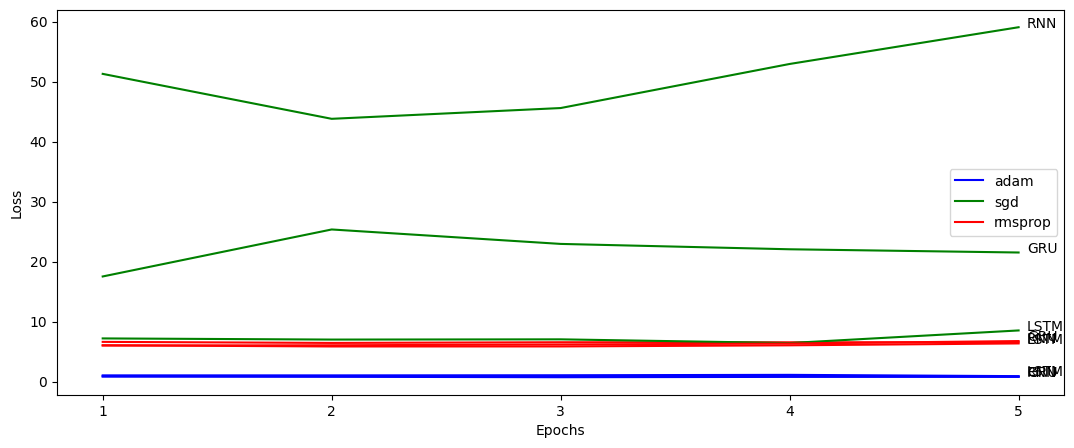

In [8]:
plt.figure(figsize=(13, 5))
x = [1,2,3,4,5]
plt.plot(x,lossRNN_adam, color='blue', label='adam')
plt.plot(x,lossRNN_sgd, color='green', label='sgd')
plt.plot(x,lossRNN_rmsprop, color='red', label='rmsprop')
plt.plot(x,lossLSTM_adam, color='blue')
plt.plot(x,lossLSTM_sgd, color='green')
plt.plot(x,lossLSTM_rmsprop, color='red')
plt.plot(x,lossGRU_adam, color='blue')
plt.plot(x,lossGRU_sgd, color='green')
plt.plot(x,lossGRU_rmsprop, color='red')
plt.xticks(x)
for y, txt in zip([lossRNN_adam, lossRNN_sgd, lossRNN_rmsprop, lossLSTM_adam, lossLSTM_sgd, lossLSTM_rmsprop, lossGRU_adam, lossGRU_sgd, lossGRU_rmsprop],['RNN','RNN','RNN','LSTM','LSTM','LSTM','GRU','GRU','GRU']):
    plt.annotate(txt, (x[-1], y[-1]), xytext=(6, 0), textcoords='offset points', fontsize=10, color='black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

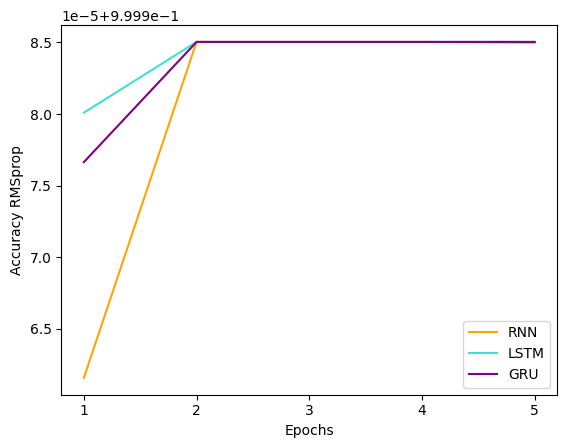

In [9]:
x = [1,2,3,4,5]
plt.plot(x,accRNN_rmsprop, color='orange', label='RNN')
plt.plot(x,accLSTM_rmsprop, color='turquoise', label='LSTM')
plt.plot(x,accGRU_rmsprop, color='purple', label='GRU')
plt.xticks(x)
plt.xlabel('Epochs')
plt.ylabel('Accuracy RMSprop')
plt.legend()
plt.show()

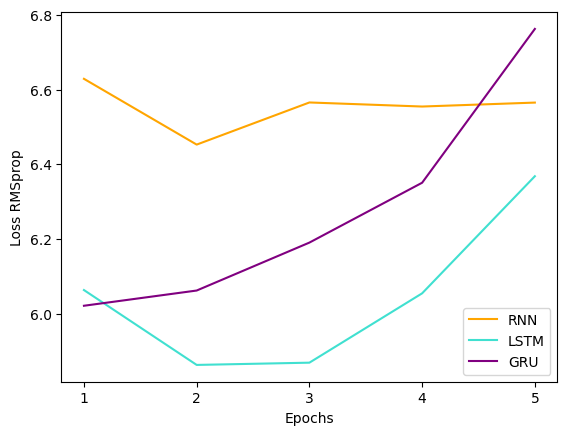

In [10]:
x = [1,2,3,4,5]
plt.plot(x,lossRNN_rmsprop, color='orange', label='RNN')
plt.plot(x,lossLSTM_rmsprop, color='turquoise', label='LSTM')
plt.plot(x,lossGRU_rmsprop, color='purple', label='GRU')
plt.xticks(x)
plt.xlabel('Epochs')
plt.ylabel('Loss RMSprop')
plt.legend()
plt.show()

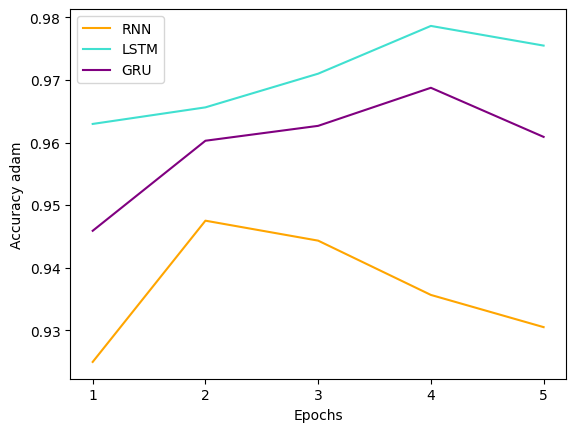

In [11]:
x = [1,2,3,4,5]
plt.plot(x,accRNN_adam, color='orange', label='RNN')
plt.plot(x,accLSTM_adam, color='turquoise', label='LSTM')
plt.plot(x,accGRU_adam, color='purple', label='GRU')
plt.xticks(x)
plt.xlabel('Epochs')
plt.ylabel('Accuracy adam')
plt.legend()
plt.show()

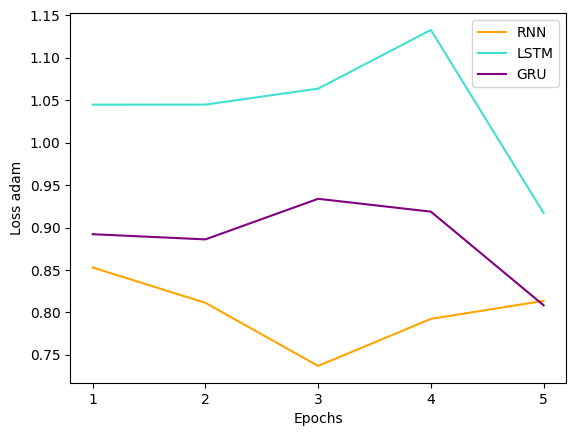

In [12]:
x = [1,2,3,4,5]
plt.plot(x,lossRNN_adam, color='orange', label='RNN')
plt.plot(x,lossLSTM_adam, color='turquoise', label='LSTM')
plt.plot(x,lossGRU_adam, color='purple', label='GRU')
plt.xticks(x)
plt.xlabel('Epochs')
plt.ylabel('Loss adam')
plt.legend()
plt.show()

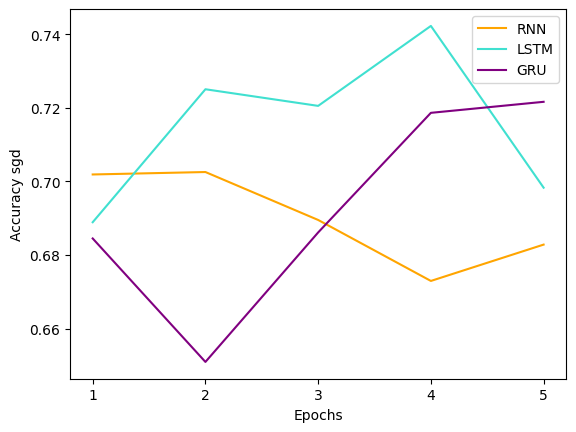

In [13]:
x = [1,2,3,4,5]
plt.plot(x,accRNN_sgd, color='orange', label='RNN')
plt.plot(x,accLSTM_sgd, color='turquoise', label='LSTM')
plt.plot(x,accGRU_sgd, color='purple', label='GRU')
plt.xticks(x)
plt.xlabel('Epochs')
plt.ylabel('Accuracy sgd')
plt.legend()
plt.show()

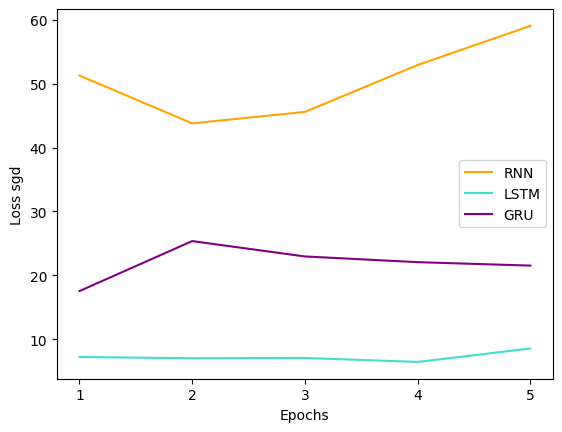

In [14]:
x = [1,2,3,4,5]
plt.plot(x,lossRNN_sgd, color='orange', label='RNN')
plt.plot(x,lossLSTM_sgd, color='turquoise', label='LSTM')
plt.plot(x,lossGRU_sgd, color='purple', label='GRU')
plt.xticks(x)
plt.xlabel('Epochs')
plt.ylabel('Loss sgd')
plt.legend()
plt.show()